# Pre-class work

### FB prediction

In [1]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

fb = pd.read_csv('2.2 facebook_train.csv')
c_type = pd.get_dummies(fb['type'])
fb = pd.concat([fb, c_type], axis=1, sort=False)
fb.head()

,total_followers,type,category,month,weekday,hour,paid,comment,like,share,Link,Photo,Status,Video
0,124050,Photo,3,6,4,17,1,3,77,16,0,1,0,0
1,132556,Photo,2,8,3,24,0,11,313,50,0,1,0,0
2,92786,Photo,2,2,6,17,1,2,145,39,0,1,0,0
3,135632,Photo,1,9,2,1,0,2,299,49,0,1,0,0
4,139540,Link,1,12,3,17,1,7,229,21,1,0,0,0


In [2]:
X = fb.drop(['type', 'comment','like','share'], axis=1)
y = fb['share']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_predict = regr.predict(X_test)
print(regr.coef_)

[ 8.51526916e-04  9.16088278e+00 -3.86068762e+00  1.03712720e+00
  3.34304440e-03  1.03642439e+01  1.42397423e+00  3.48521770e+00
  3.24430930e+00 -8.15350124e+00]


In [4]:
X_train.shape

(238, 10)

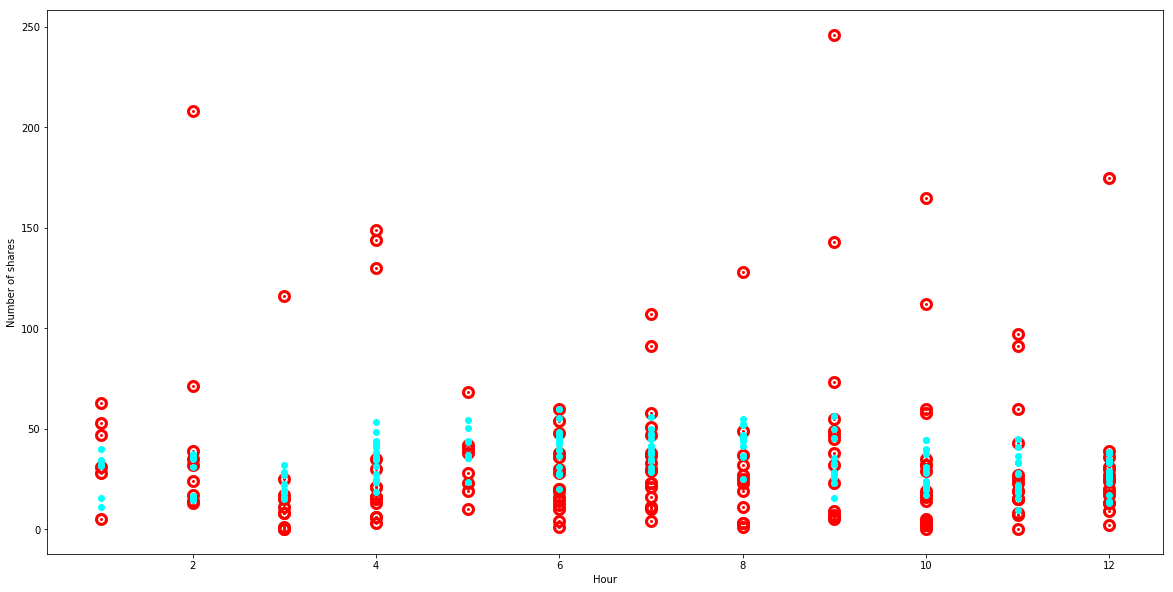

In [16]:
from matplotlib import pyplot as plt

X_train.shape

plt.figure(figsize=(20,10))
plt.scatter(X_test['month'], y_test, color="red", marker=".", linewidth=10)
plt.scatter(X_test['month'], y_predict, color="aqua")
plt.xlabel("Hour")
plt.ylabel("Number of shares")
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predict), "shares²")
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_predict), "shares")
print("Median absolute error: %.2f" % median_absolute_error(y_test, y_predict), "shares")
print("Coefficient of determination: %.2f" % r2_score(y_test, y_predict))

Mean squared error: 1581.49 shares²
Mean absolute error: 24.54 shares
Median absolute error: 17.29 shares
Coefficient of determination: 0.01


### Casualty prediction

In [7]:
cs = pd.read_csv("2.2 casualty_train.csv")
c_class = pd.get_dummies(cs['casualty_class'])
c_gender = cs['casualty_class'].apply(lambda gender: (0 if gender == 'male' else 1))
c_age = cs['age'].apply(lambda age: (0 if age == 'Unknown' else age))
c_location = pd.get_dummies(cs['pedestrian_location'])
c_movement = pd.get_dummies(cs['pedestrian_movement'])
c_travel = pd.get_dummies(cs['travel'])

cs = pd.concat([cs, c_class, c_age, c_gender, c_location, c_movement, c_travel], axis=1, sort=False)
cs = cs.drop(['casualty_class', 'gender', 'pedestrian_location', 'pedestrian_movement', 'travel', 'age'], axis=1)
cs.head()

,severe,year,driver,passenger,pedestrian,Close to Crossing,Footpath,In road,Not on Crossing,Pedestrian Crossing,...,In Rd Not Crossing,In Rd Not Crossing Msk,Unknown Or Other,bicycle,bus,car,motorbike,other,pedestrian,taxi
0,False,2007,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,False,2005,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,False,2006,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,False,2012,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,False,2010,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
X1 = cs.drop(['severe'], axis=1)
y1 = cs['severe'].apply(lambda severe: (0 if severe == False else 1))

X1.head()

,year,driver,passenger,pedestrian,Close to Crossing,Footpath,In road,Not on Crossing,Pedestrian Crossing,Unknown,...,In Rd Not Crossing,In Rd Not Crossing Msk,Unknown Or Other,bicycle,bus,car,motorbike,other,pedestrian,taxi
0,2007,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2005,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2006,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2012,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2010,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(3, weights='uniform')
clf.fit(X1_train, y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [25]:
y1_predict = clf.predict(X1_test)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

print("Accuracy score: %.2f" % accuracy_score(y1_test, y1_predict))
print("Precision score: %.2f" % precision_score(y1_test, y1_predict))
print("Recall score: %.2f" % recall_score(y1_test, y1_predict))
print("Area under ROC curve: %.2f" % roc_auc_score(y1_test, y1_predict))

Accuracy score: 0.88
Precision score: 0.20
Recall score: 0.05
Area under ROC curve: 0.51
